In [17]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

## Discussion Question ##

In [18]:
drinks = Table(['Drink', 'Cafe', 'Price']).with_rows([
    ['Milk Tea', 'Tea One', 4],
    ['Espresso', 'Nefeli',  2],
    ['Latte',    'Nefeli',  3],
    ['Espresso', "Abe's",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Tea One,4
Espresso,Nefeli,2
Latte,Nefeli,3
Espresso,Abe's,2


In [19]:
discounts = Table().with_columns(
    'Coupon % off', make_array(25, 50, 5),
    'Location', make_array('Tea One', 'Nefeli', 'Tea One')
)
discounts

Coupon % off,Location
25,Tea One
50,Nefeli
5,Tea One


In [20]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Nefeli,Espresso,2,50
Nefeli,Latte,3,50
Tea One,Milk Tea,4,25


In [22]:
discounted_price = combined.column('Price') * (1 - combined.column('Coupon % off')/100)
combined = combined.with_column('Discounted price', discounted_price)
combined

Cafe,Drink,Price,Coupon % off,Discounted price
Nefeli,Espresso,2,50,1
Nefeli,Latte,3,50,1.5
Tea One,Milk Tea,4,25,3


In [25]:
combined.select('Cafe', 'Discounted price').group('Cafe', min)

Cafe,Discounted price min
Nefeli,1
Tea One,3


## Bikes

In [26]:
trip = Table.read_table('trip.csv')
trip.show(5)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


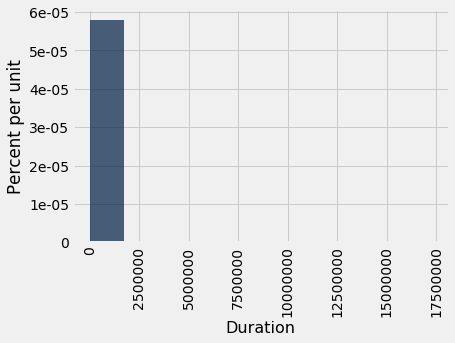

In [27]:
trip.hist('Duration')

In [28]:
max(trip.column('Duration'))

17270400

In [29]:
17270400 / 60 / 60 / 24 #someone stole a bike?

199.88888888888889

In [31]:
free = trip.where('Duration', are.below(30*60))
free

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


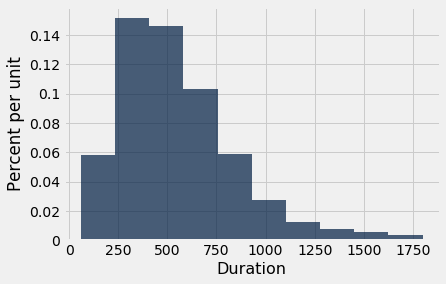

In [32]:
free.hist('Duration')

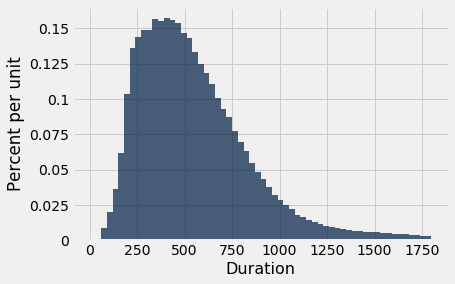

In [33]:
free.hist('Duration', bins=np.arange(0,1801,30))

In [34]:
0.15 * (550 - 250)

45.0

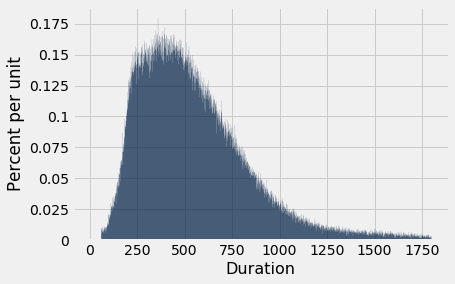

In [35]:
free.hist('Duration', bins=np.arange(1801))

In [38]:
starts = free.group('Start Station')
starts.sort('count', descending = True)

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


In [40]:
duration.pivot('Start Station', 'End Station', 'Duration', min).sort('Beale at Market')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
Adobe on Almaden,0,0,0,0,84,275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,701,387,0,0,0,0,0,0,0,0,0,229,0,0,0,0,0,0,0,441,452,318,0,0,0,0,0,309,146,182,0,207,358,876,101,0,0,369,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,305,62,0,0,0,0,0,0,0,0,0,0,0,0,0,27409,0,0,0,0,0,526,546,0,0,0,0,0,0,0,0,0,403,0,0,0,0,0,0,0,288,875,685,0,0,0,0,0,440,420,153,0,166,624,759,116,0,0,301,0,0,0,0,0,0,0
California Ave Caltrain Station,0,0,0,0,0,0,0,0,82,1645,0,0,0,628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,1771,2304,484,131,0,0,0,0,2457,0,0,1077,0,0,0,870,911,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2872,0,0,0,531,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,499,0,0,0,0,0,0,0,0,0,0,0,0,201,108,0,2139,0,0,0,0,0,0,0,654,0,0,0,953,696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4150,0,0
Cowper at University,0,0,0,0,0,0,0,0,763,7530,0,0,0,76,0,0,0,0,0,0,2654,0,0,0,0,0,0,0,0,0,0,0,0,0,139,758,0,0,0,0,0,0,0,0,0,0,0,2114,1631,0,0,0,0,0,0,12731,0,0,0,0,0,0,0,4894,0,0,0,145,0,0
Evelyn Park and Ride,0,0,0,0,0,0,0,0,0,627,0,0,0,11334,0,0,0,0,0,74,0,0,0,0,0,0,0,0,0,0,0,0,191,352,0,0,0,0,0,0,0,0,0,782,0,0,0,1185,1046,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Franklin at Maple,0,0,0,0,0,0,0,0,0,0,0,0,0,2468,0,0,0,0,0,0,172,0,0,0,0,0,0,0,0,0,0,0,0,0,3120,0,0,0,0,0,160,992,100,0,0,0,0,9493,0,0,0,0,0,0,0,334,0,0,0,0,0,0,0,407,0,0,0,1776,0,0
Japantown,0,0,0,0,698,467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,380,0,0,0,0,0,6067,0,0,0,369,0,0,0,0,0,0,0,202,706,483,0,0,0,0,0,273,612,574,0,364,543,358,517,0,0,261,0,0,0,0,0,0,0
MLK Library,0,0,0,0,248,460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,348,66,0,0,0,0,0,0,0,0,0,130,0,0,0,0,0,0,0,349,285,109,0,0,0,0,0,73,226,367,0,286,204,883,236,0,0,144,0,0,0,0,0,0,0
Mountain View Caltrain Station,0,0,0,0,0,0,0,0,2264,176,0,0,0,0,0,0,0,0,0,144,0,0,0,0,0,0,18475,0,0,0,0,0,67,130,1008,1271,0,0,0,0,16744,0,0,447,0,0,0,601,610,0,0,0,0,8264,11359,0,0,0,0,0,0,0,0,0,0,0,0,2302,0,0


In [41]:
duration.select('Start Station', 'End Station', 'Duration').group(['Start Station', 'End Station'], min)



Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


## Spring 2016 Midterm, Question 2(b)

Challenge yourself and try to solve these on your own before looking at the solutions!

In [42]:
trip = trip.select('Start Station', 'End Station', 'Duration').relabeled('Start Station', 'Start').relabeled('End Station', 'End')
trip.show(3)

Start,End,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307


In [ ]:
# The name of the station where the most rentals ended (assume no ties).

In [45]:
trip.group('End').sort('count', descending = True).column('End').item(0)

'San Francisco Caltrain (Townsend at 4th)'

In [ ]:
# The number of stations for which the average duration ending at that station was more than 10 minutes.


In [48]:
trip.group('End', np.average).where('Duration average', are.above(10*60)).num_rows

68

In [ ]:
# Challenge: The number of stations that have more than 500 starts AND more than 500 ends

#hint: as a first step, make two tables that contain only the 500+ start stations and 500+ end stations, respectively